# Seaborn
## Lab 8 TWD 23.11.2020

[https://seaborn.pydata.org/](https://seaborn.pydata.org/)

Za oficjalną stroną seaborna:

> If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

Przykłady z [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)



In [1]:
from IPython.display import HTML
HTML('<iframe width="610" height="343" src="https://www.youtube.com/embed/rg6CiPI6h2g" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# opcje wyswietlania
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows=10
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [3]:
import os
os.getcwd()

'C:\\Users\\akaga\\2021Z-DataVisualizationTechniques\\labs\\group_2'

In [6]:
os.chdir("C:\\Users\\akaga\\2021Z-DataVisualizationTechniques\\labs\\data")
os.getcwd()

'C:\\Users\\akaga\\2021Z-DataVisualizationTechniques\\labs\\data'

In [7]:
df = pd.read_csv('Pokemon.csv', index_col=0, sep = ",")
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Wykres punktowy

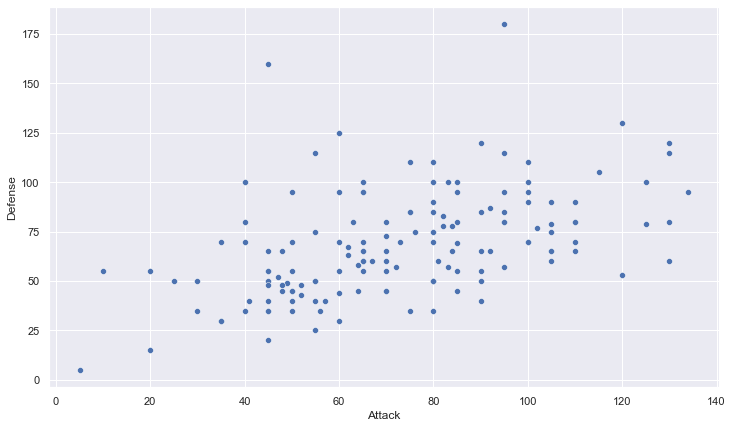

In [8]:
sns.scatterplot(data=df, x='Attack', y='Defense')
plt.show()

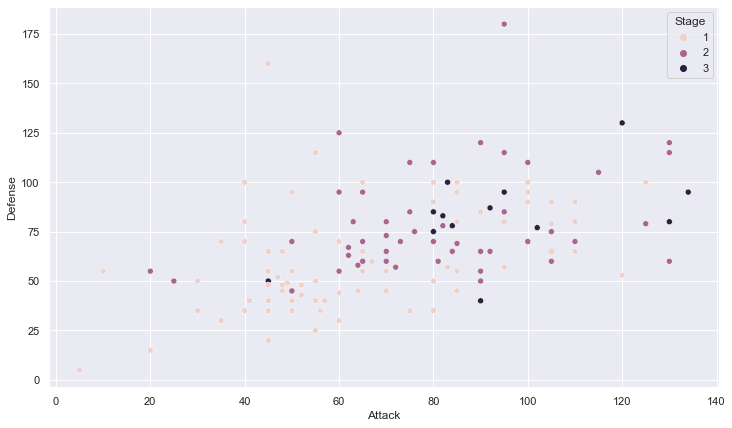

In [9]:
sns.scatterplot(data=df, x='Attack', y='Defense', hue="Stage")
plt.show()

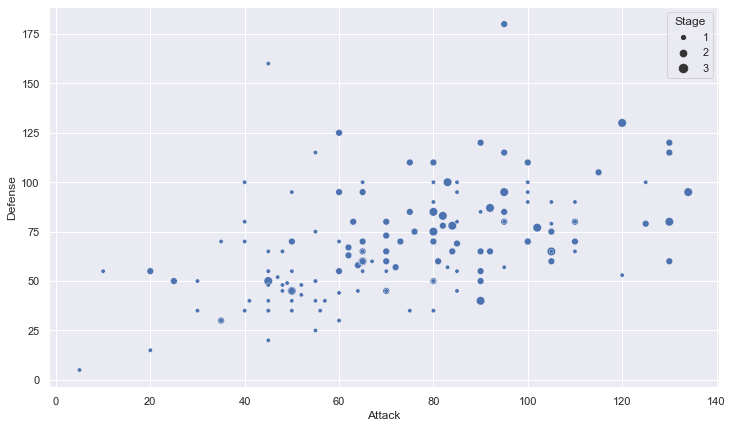

In [10]:
sns.scatterplot(data=df, x='Attack', y='Defense', size="Stage")
plt.show()

Dokumentacja https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Dostosowywanie poprzez matplotlib

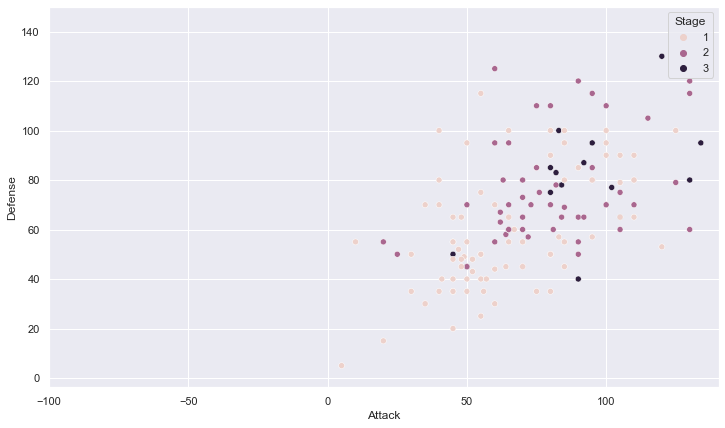

In [11]:
sns.scatterplot(x='Attack', y='Defense', data=df,
           hue='Stage')

plt.ylim(None,150)
plt.xlim(-100, None)
plt.show()

## Boxplot

Uwaga, inny format ramki danych niż przy ggplot2. 

In [12]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


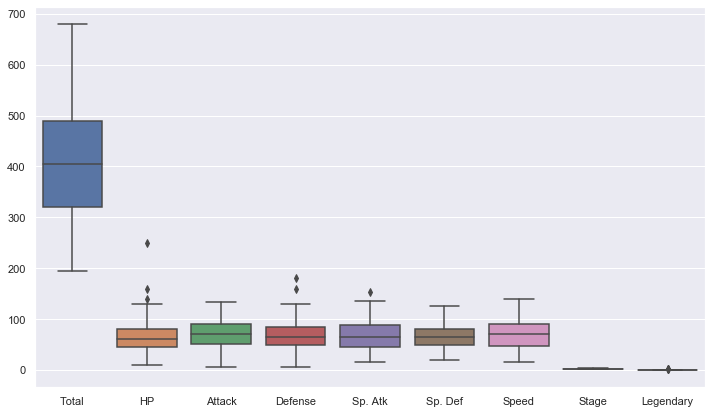

In [13]:
sns.boxplot(data=df)
plt.show()

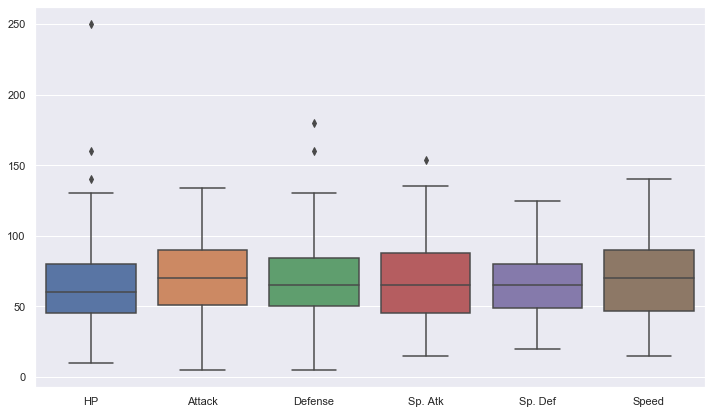

In [14]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
sns.boxplot(data=stats_df)
plt.show()

Można też podać format jak w ggplot2

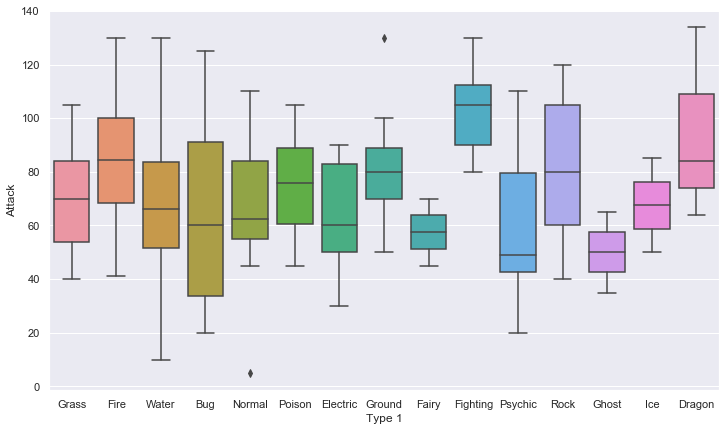

In [15]:
sns.boxplot(data=stats_df, x = "Type 1", y = "Attack")
plt.show()

## Violin plot

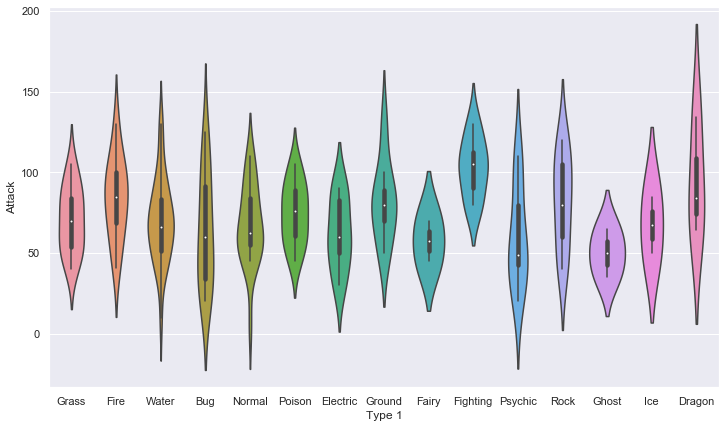

In [16]:
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.show()

### Definiowanie palet kolorów

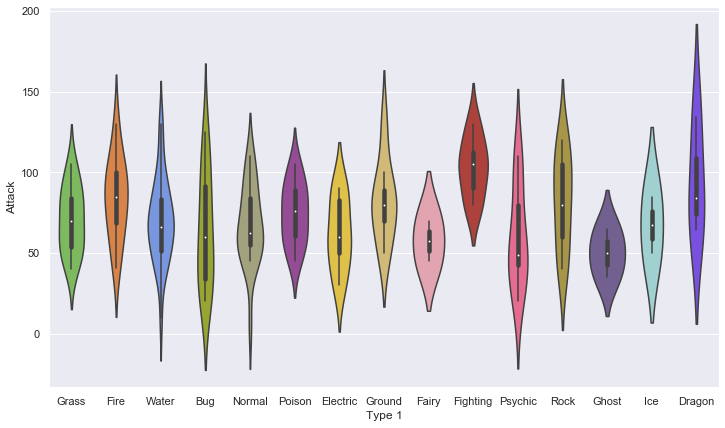

In [17]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors)
plt.show()

## Swarm plot

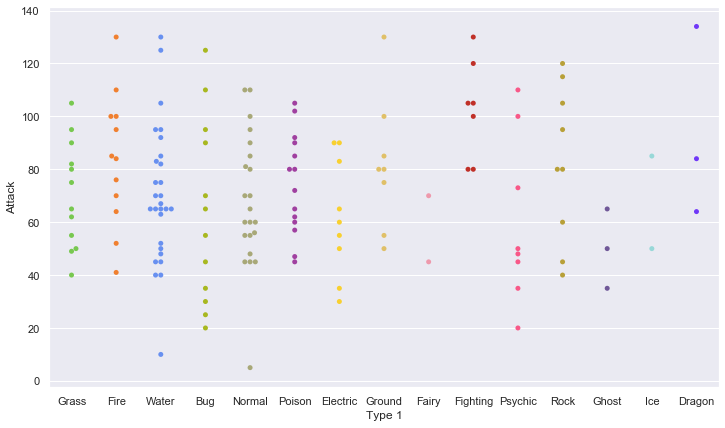

In [18]:
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.show()

## Nakładanie wykesów

Text(0.5, 1.0, 'Attack by Type')

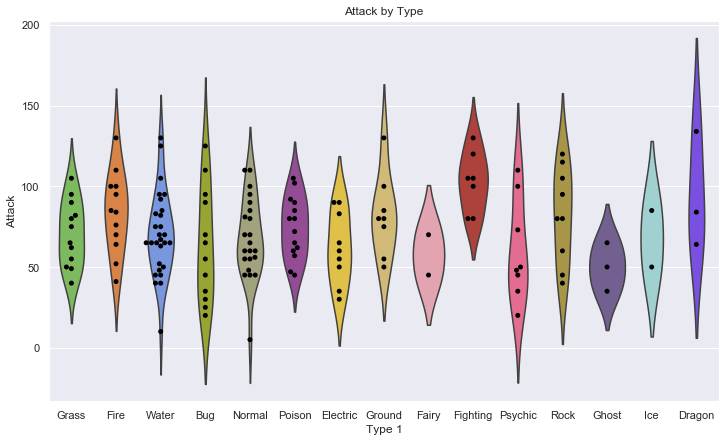

In [19]:
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # usunięcie boxplotów ze środka
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='black')# Punkty czarne
 
# Tytuł z matplotlib
plt.title('Attack by Type')

## Łączenie wielu statystyk

In [20]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


Przejście do postaci długiej

In [21]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Zmienne do zatrzymania
                    var_name="Stat") # Nazwa nowej zmiennej
melted_df

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
...,...,...,...,...,...
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130


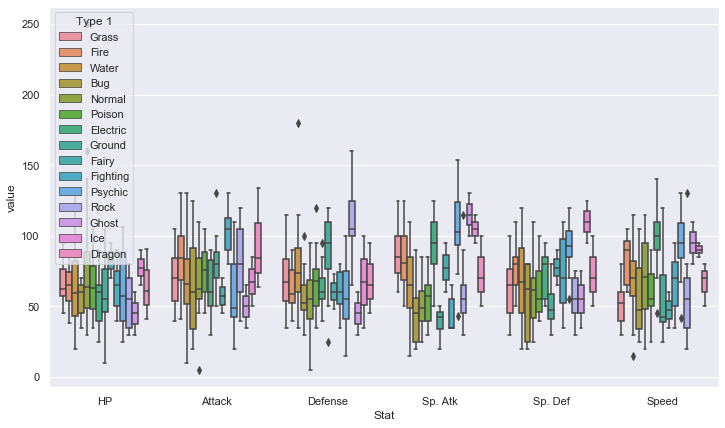

In [22]:
sns.boxplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')
plt.show()

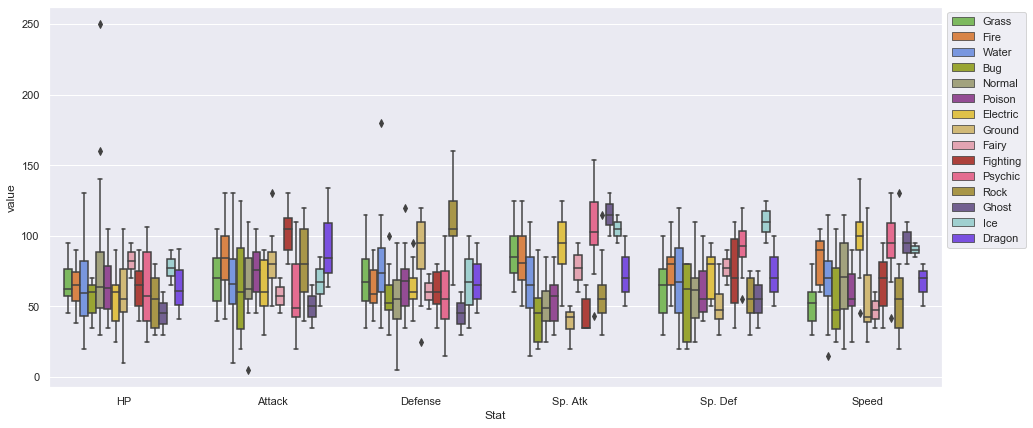

In [23]:
# Powiększamy wykres
plt.figure(figsize=(16,7))
 
sns.boxplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              palette=pkmn_type_colors) # Dodajemy paletę

# przenosimy legendę
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

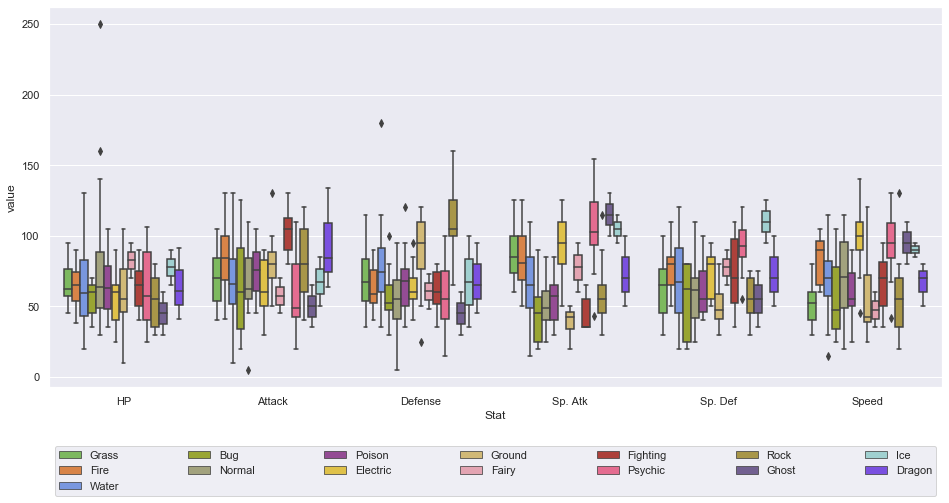

In [24]:
# Powiększamy wykres
plt.figure(figsize=(16,7))
 
sns.boxplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              palette=pkmn_type_colors) # Dodajemy paletę

# przenosimy legendę
# plt.legend(bbox_to_anchor=(1, 1))
plt.legend(bbox_to_anchor=(0, -.3, 1, -.2), ncol=7, mode = "expand", loc='lower left')
plt.show()

## Więcej wizualizacji

### Barplot

In [25]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Zliczanie wystąpień

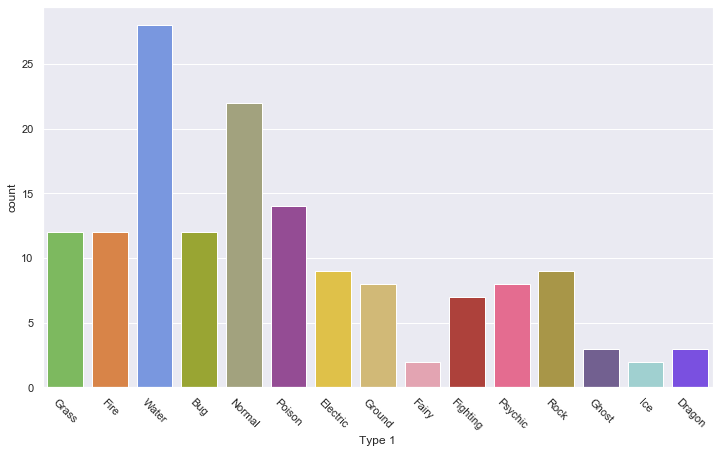

In [26]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# obrócenie podpisów na osi
plt.xticks(rotation=-45)
plt.show()

Podane wartości

In [27]:
df_counts = df["Type 1"].value_counts().to_frame().reset_index()
df_counts.columns = ["Type 1", "Count"]
df_counts

,Type 1,Count
0,Water,28
1,Normal,22
2,Poison,14
3,Fire,12
4,Grass,12
...,...,...
10,Fighting,7
11,Dragon,3
12,Ghost,3
13,Fairy,2


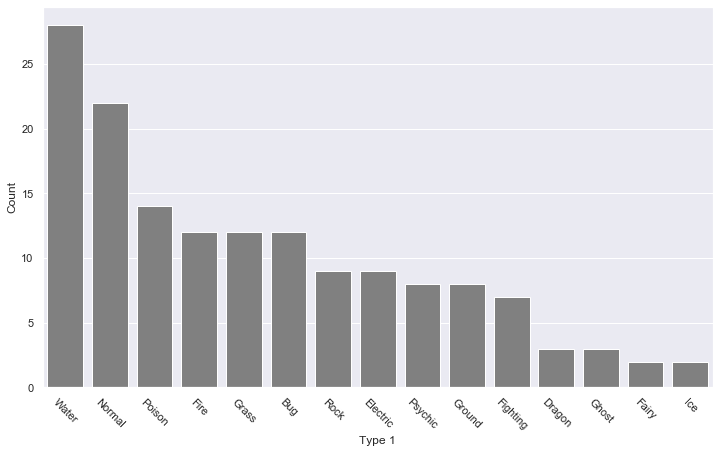

In [28]:
sns.barplot(data = df_counts, x = "Type 1", y = "Count",
           color = "grey")
plt.xticks(rotation=-45)
plt.show()

### Histogram

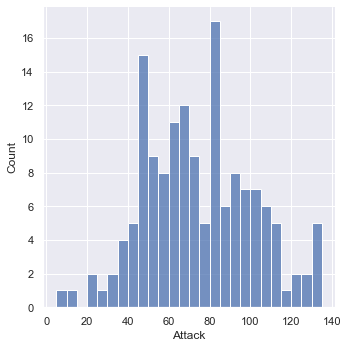

In [29]:
sns.displot(data = df, x = "Attack", binwidth=5)
# można te uzyć histplot()
plt.show()

### Wykres gęstości

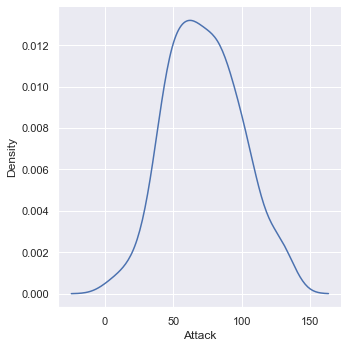

In [30]:
sns.displot(data = df, x = "Attack", kind="kde")
plt.show()

## Panele

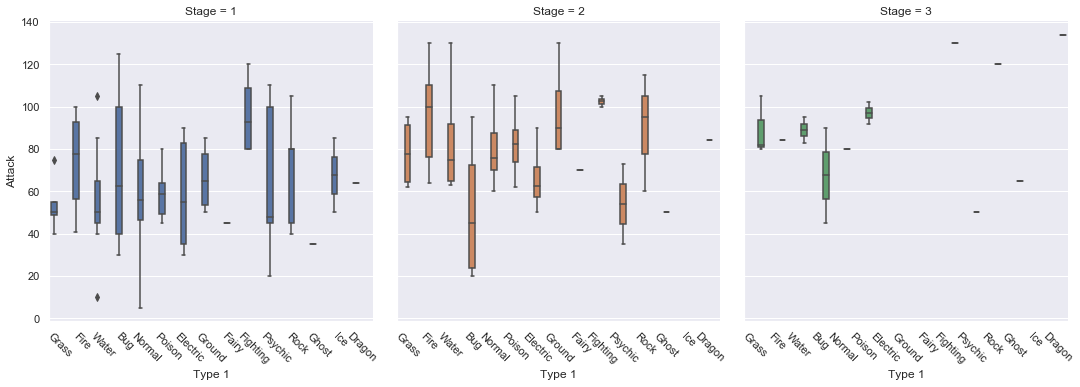

In [31]:
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # kolor
                   col='Stage',  # podział po Stage
                   kind='box') # typ
 
g.set_xticklabels(rotation=-45)
 
plt.show()

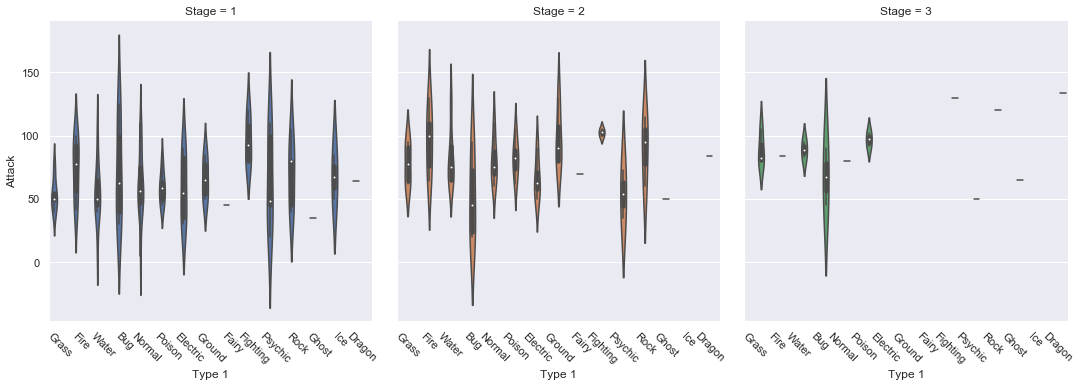

In [32]:
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # kolor
                   col='Stage',  # podział po Stage
                   kind='violin') # typ
 
g.set_xticklabels(rotation=-45)
 
plt.show()

## Więcej można znaleźć w galerii

http://seaborn.pydata.org/examples/

# Zadanie
Narysować wykresy dla zbior danych Titanic, zawierającego dane pasażerów.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

### a) histogram dla zmiennej fare (opłata z bilet)

### b) Boxploty wieku w podziale na płeć

### c) Wykresy skrzypcowe dla wieku w podziale na płeć i klasę. Można użyć na przykład kolorów czy podziału na panele.

### d) Wykres słupkowy pokazujący liczbę pasażerów w każdej z trzech klas

### e) Procent osób, które przeżyły (zmienna survived) w każdej z klas 